In [1]:
import os 
train_covid_masks = os.path.join('G:/tensorflow/people_with_masks/masks')
train_covid_nomasks = os.path.join('G:/tensorflow/people_with_masks/images')

In [2]:
covid_mask_names = os.listdir(train_covid_masks)
covid_nomasks_names = os.listdir(train_covid_nomasks)
print(covid_mask_names[:10])
print(covid_nomasks_names[:10])

['100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg']
['n1.jpg', 'n10.jpg', 'n100.jpg', 'n11.jpg', 'n12.jpg', 'n13.jpg', 'n14.jpg', 'n15.jpg', 'n16.jpg', 'n17.jpg']


In [3]:
print("Total Images in the training are ", len(covid_mask_names))
print("Total Images in the training are ", len(covid_nomasks_names))

Total Images in the training are  222
Total Images in the training are  100


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

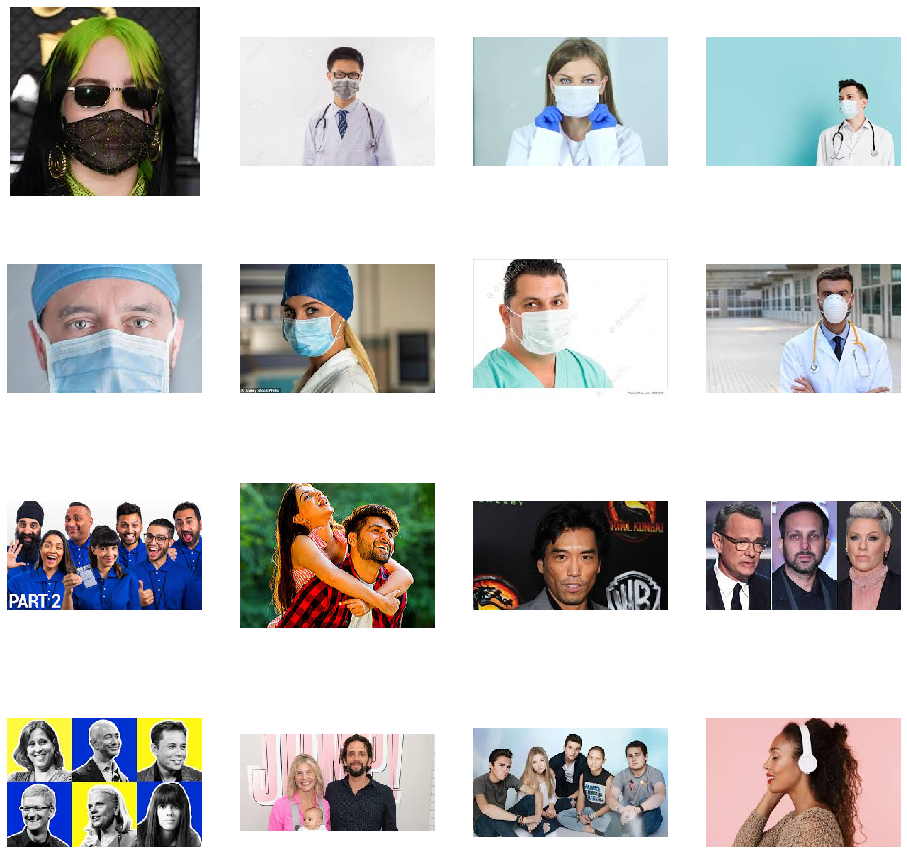

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_maskedPerson_pix = [os.path.join(train_covid_masks, fname) 
                for fname in covid_mask_names[pic_index-8:pic_index]]
next_nomaskedPerson_pix = [os.path.join(train_covid_nomasks, fname)
                for fname in covid_nomasks_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_maskedPerson_pix+next_nomaskedPerson_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
!pip install protobuf==3.9.2

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.5.1
    Uninstalling protobuf-3.5.1:
      Successfully uninstalled protobuf-3.5.1


In [11]:
!pip install tensorflow==2.3.0

In [12]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\pc\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [18]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('mask')  and 1 for the other ('no mask')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'G:/tensorflow/people_with_masks',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



Found 322 images belonging to 2 classes.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=16,  
      epochs=20,
      verbose=1,
      )

  ...
    to  
  ['...']
Train for 16 steps
Epoch 1/20
16/16 [==============================] - 92s 6s/step - loss: 0.9102 - accuracy: 0.6125
Epoch 2/20
16/16 [==============================] - 71s 4s/step - loss: 0.6304 - accuracy: 0.6974
Epoch 3/20
16/16 [==============================] - 77s 5s/step - loss: 0.5267 - accuracy: 0.7632
Epoch 4/20
16/16 [==============================] - 76s 5s/step - loss: 0.6510 - accuracy: 0.6842
Epoch 5/20
16/16 [==============================] - 74s 5s/step - loss: 0.6138 - accuracy: 0.6974
Epoch 6/20
16/16 [==============================] - 74s 5s/step - loss: 0.5431 - accuracy: 0.7500
Epoch 7/20
16/16 [==============================] - 80s 5s/step - loss: 0.5160 - accuracy: 0.6974
Epoch 8/20
16/16 [==============================] - 81s 5s/step - loss: 0.4844 - accuracy: 0.7937
Epoch 9/20
16/16 [==============================] - 73s 5s/step - loss: 0.4702 - accuracy: 0.7961
Epoch 10/20
16/16 [==============================] - 74s 5s/step - loss: 0

In [29]:
!pip install keras

You should consider upgrading via the 'c:\users\pc\anaconda3\python.exe -m pip install --upgrade pip' command.


In [42]:
!pip install --upgrade pip
!pip install tensorflow==2.3.0

Requirement already up-to-date: pip in c:\users\pc\anaconda3\lib\site-packages (20.2.2)


In [43]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image

uploaded = os.path('G:\TensorFlow\people_with_masks\masks\43.jpg')

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is wearing a mask")
  else:
    print(fn + " is not wearing a mask")
 

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`